<a href="https://colab.research.google.com/github/Mint0511/PTDL-25-26/blob/minh/minh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bạn đã bao giờ tự hỏi những yếu tố nào đóng vai trò quan trọng trong việc dự đoán nguy cơ mắc bệnh tiểu đường type 2? Liệu số lần mang thai, chỉ số BMI hay tiền sử gia đình có ảnh hưởng mạnh mẽ nhất? Và điều gì sẽ xảy ra nếu chúng ta muốn dự đoán khả năng mắc bệnh của một cá nhân trong vòng 5 năm tới?**

# **Bộ dữ liệu Pima Indians Diabetes có thể giúp bạn khám phá những câu hỏi đó!**
# **Tập dữ liệu này được thu thập từ cộng đồng người Pima ở Arizona (Mỹ), vốn có tỷ lệ mắc bệnh tiểu đường type 2 cao. Nó bao gồm các thông tin y tế như số lần mang thai, nồng độ glucose trong máu, huyết áp, độ dày da, nồng độ insulin, chỉ số BMI, yếu tố di truyền tiểu đường (Diabetes Pedigree Function) và tuổi. Nhãn mục tiêu cho biết liệu bệnh nhân có phát triển bệnh tiểu đường type 2 trong vòng 5 năm hay không.**

# **Với dữ liệu này, bạn có thể khám phá và phân tích để tìm ra những yếu tố nguy cơ then chốt, so sánh ảnh hưởng của các biến số, và xây dựng các mô hình dự báo (ví dụ logistic regression, random forest, neural networks) để hỗ trợ chẩn đoán sớm và phòng ngừa bệnh tiểu đường.**

In [2]:
# Importing các thư viện Python cần thiết
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline

In [3]:
# Import thư viện google colab để kết nối với google drive (link đã đưa vào nhóm, nhớ truy cập)
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Định nghĩa tên các cột dữ liệu dựa trên file .names để dễ đọc
column_names = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
    'Outcome'
]

**Ý nghĩa từng cột dữ liệu**
- Pregnancies: số lần mang thai
- Glucose: nồng độ glucose trong máu sau khi nhịn ăn 2 giờ
- BloodPressure: huyết áp tâm thu (mm Hg)
- SkinThickness: độ dày da ở vùng tam giác vai (mm)
- Insulin: nồng độ insulin trong máu sau khi nhịn ăn (mu U/ml)
- BMI: chỉ số khối cơ thể (kg/m^2)
- DiabetesPedigreeFunction: hàm di truyền bệnh tiểu đường
- Age: tuổi (năm)
- Outcome: kết quả chẩn đoán (1: có tiểu đường, 0: không có tiểu đường)

In [5]:
# đọc dữ liệu từ file csv trong link google drive
diabetes_df = pd.read_csv("/content/drive/MyDrive/PTDL 25-26/pima-indians-diabetes.data.csv", names=column_names)           # Reading the data file

In [6]:
# Hiển thị 5 dòng đầu tiên của dataframe
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Hiển thị thông tin tổng quan về dataframe
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Tổng quan về DataFrame:**
- Bao gồm: số lượng dòng, số lượng cột, tên cột, kiểu dữ liệu của từng cột, và số lượng giá trị không null trong mỗi cột.
- RangeIndex: có 768 dòng, đánh số từ 0 đến.
- Data columns (total 9 columns): có 9 cột dữ liệu.
- dtypes: int64(8), float64(1): có 8 cột kiểu int64 và 1 cột kiểu float64
- memory usage: 54.1 KB: bộ nhớ sử dụng để lưu trữ dataframe

In [8]:
# Hiển thị các thống kê mô tả cơ bản của dataframe
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Hiển thị các thống kê mô tả cơ bản của dataframe**
- Các thống kê mô tả cơ bản bao gồm số lượng giá trị không null, trung bình, độ lệch chuẩn, giá trị min, các phần trăm vị trí (25%, 50%, 75%), và giá trị max cho mỗi cột số
- count: số lượng giá trị không null trong mỗi cột
- mean: giá trị trung bình của mỗi cột
- std: độ lệch chuẩn của mỗi cột
- min: giá trị nhỏ nhất trong mỗi cột
- 25%: giá trị tại vị trí phần trăm thứ 25 trong mỗi cột
- 50%: giá trị tại vị trí phần trăm thứ 50 (trung vị) trong mỗi cột
- 75%: giá trị tại vị trí phần trăm thứ 75 trong mỗi cột
- max: giá trị lớn nhất trong mỗi cột  
**=> Các thống kê này giúp hiểu rõ hơn về phân phối và phạm vi của dữ liệu trong mỗi cột**

Chúng ta thấy rằng tập dữ liệu có 9 cột và 768 hàng. Tất cả các cột đều có đủ 768 giá trị không rỗng, cho thấy không có giá trị thiếu (null values) rõ ràng trong tập dữ liệu.

In [9]:
# Tạo một bản sao của dataframe để tránh thay đổi dữ liệu gốc
df1 = diabetes_df.copy()

Trước hết, chúng ta sẽ cố gắng hiểu ý nghĩa của tất cả các cột trong khung dữ liệu.
Để làm được điều này, chúng ta sẽ xem xét các giá trị duy nhất đạt được bởi mỗi cột mà chúng ta không thể hiểu được ý nghĩa của chúng.

In [10]:
# Kiểm tra các giá trị duy nhất trong cột 'Pregnancies'
df1['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [11]:
# Kiểm tra các giá trị duy nhất trong cột 'Glucose'
df1['Glucose'].unique() #cột này có giá trị 0

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [12]:
# Kiểm tra các giá trị duy nhất trong cột 'BloodPressure'
df1['BloodPressure'].unique() # cột này có giá trị 0

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [13]:
# Kiểm tra các giá trị duy nhất trong cột 'SkinThickness'
df1['SkinThickness'].unique() #cột này có giá trị 0

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [14]:
# Kiểm tra các giá trị duy nhất trong cột 'Insulin'
df1['Insulin'].unique() #cột này có giá trị 0

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [15]:
# Kiểm tra các giá trị duy nhất trong cột 'BMI'
df1['BMI'].unique() # có giá tri 0

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [16]:
# Kiểm tra các giá trị duy nhất trong cột 'DiabetesPedigreeFunction'
df1['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [17]:
# Kiểm tra các giá trị duy nhất trong cột 'Age'
df1['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [18]:
# Kiểm tra các giá trị duy nhất trong cột 'Outcome'
df1['Outcome'].unique()

array([1, 0])

**Clean data**

Làm sạch dữ liệu là một bước quan trọng trước khi Phân tích Khám phá Dữ liệu (EDA) vì nó sẽ loại bỏ các dữ liệu không rõ ràng có thể ảnh hưởng đến kết quả của EDA.

Trong quá trình làm sạch dữ liệu, chúng ta sẽ thực hiện các bước sau:

+ Loại bỏ các hàng trùng lặp.

+ Xử lý các giá trị bị thiếu.

+ Chuyển đổi kiểu dữ liệu của các cột cho phù hợp.

+ Thêm các cột quan trọng (nếu cần).

# **Bước 1: Loại bỏ trùng lặp**

In [19]:
# Kiểm tra trùng lặp dữ liệu trong dataframe
df1[df1.duplicated()].shape   # Kiểm tra trùng lặp

(0, 9)

Kết quả: (0, 9): 0 dòng, 9 cột  
=> Bảng dữ liệu không có dữ liệu trùng lặp

In [20]:
# Hiển thị kích thước của dataframe
df1.shape

(768, 9)

Bảng dữ liệu có 768 hàng và 9 cột

# **Bước 2: Xử lý các giá trị bị thiếu**

In [21]:
# Cột có giá trị thiếu
df1.isnull().sum().sort_values(ascending = False)[:6]

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


Không có giá trị thiếu trong các cột dữ liệu

Tuy nhiên. Vì các cột dữ liệu "Glucose"	"BloodPressure"	"SkinThickness"	"Insulin"	"BMI" có dữ liệu '0' được xem là dữ liệu thiếu (vì các giá trị này không thể bằng 0) nên chúng ta sẽ thay thế chúng bằng giá trị trung vị để tránh ảnh hưởng bởi các giá trị ngoại lai

- Giá trị trung vị (median) là giá trị ở giữa khi các giá trị được sắp xếp theo thứ tự  
Ví dụ: trong cột 'Glucose', nếu có các giá trị [0, 85, 90, 95, 100], giá trị trung vị là 90
- Giá trị ngoại lai (outliers) là các giá trị nằm xa so với phần lớn các giá trị khác trong tập dữ liệu  
Ví dụ: trong cột 'Insulin', nếu có các giá trị [0, 15, 20, 25, 300], giá trị 300 là một giá trị ngoại lai vì nó nằm xa so với các giá trị khác
- Việc sử dụng giá trị trung vị giúp giảm thiểu ảnh hưởng của các giá trị ngoại lai này khi thay thế các giá trị 0, giúp duy trì tính toàn vẹn của dữ liệu, tránh việc làm sai lệch các phân tích sau này

In [22]:
# Danh sách các cột có giá trị 0 cần xử lý
columns_to_process = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Duyệt qua từng cột và thay thế giá trị 0 bằng giá trị trung vị
for column in columns_to_process:
    # Lấy giá trị trung vị của cột, bỏ qua các giá trị 0
    median_value = df1[df1[column] != 0][column].median()

    # Thay thế các giá trị 0 bằng giá trị trung vị
    df1[column] = df1[column].replace(0, median_value)

In [23]:
# Kiểm tra lại các cột để đảm bảo không còn giá trị 0
print(df1[columns_to_process].describe())

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      29.108073  140.671875   32.455208
std     30.438286      12.096642       8.791221   86.383060    6.875177
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


Hàng "min" của các cột dữ liệu "Glucose" "BloodPressure" "SkinThickness" "Insulin" "BMI" đều có giá trị >0. Vì vậy các cột này đã được xử lý các dữ liệu thiếu

# **Bước 3: Chuyển đổi kiểu dữ liệu của các cột cho phù hợp.**

Sau khi kiểm tra cấu trúc dữ liệu, các kiểu dữ liệu của từng cột đã được xác định là phù hợp với nội dung của chúng (số nguyên cho các biến đếm và số thực cho các chỉ số). Do đó, không cần thực hiện bất kỳ thay đổi nào đối với kiểu dữ liệu. Bước này xác nhận rằng dữ liệu đã sẵn sàng cho quá trình phân tích tiếp theo.

# **Bước 4: Thêm các cột quan trọng.**

In [24]:
import pandas as pd

# Giả sử bạn đã tải dữ liệu vào DataFrame có tên là df

# Tạo cột phân loại BMI
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Gầy'
    elif 18.5 <= bmi < 24.9:
        return 'Bình thường'
    elif 24.9 <= bmi < 29.9:
        return 'Thừa cân'
    else:
        return 'Béo phì'

df1['BMI_Category'] = df1['BMI'].apply(classify_bmi)

# Tạo cột phân loại Glucose
def classify_glucose(glucose):
    if glucose < 110:
        return 'Bình thường'
    elif 110 <= glucose < 126:
        return 'Tiền tiểu đường'
    else:
        return 'Tiểu đường'

df1['Glucose_Category'] = df1['Glucose'].apply(classify_glucose)


# Tạo một hàm đơn giản để phân loại chỉ số DiabetesPedigreeFunction
def classify_pedigree(score):
    if score >= 0.5:
        return 'Nguy cơ cao'
    else:
        return 'Nguy cơ thấp'

# Áp dụng hàm để tạo cột mới 'Family_History'
df1['Family_History'] = df1['DiabetesPedigreeFunction'].apply(classify_pedigree)

In [25]:
# Hiển thị 5 dòng đầu tiên của dataframe
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Glucose_Category,Family_History
0,6,148,72,35,125,33.6,0.627,50,1,Béo phì,Tiểu đường,Nguy cơ cao
1,1,85,66,29,125,26.6,0.351,31,0,Thừa cân,Bình thường,Nguy cơ thấp
2,8,183,64,29,125,23.3,0.672,32,1,Bình thường,Tiểu đường,Nguy cơ cao
3,1,89,66,23,94,28.1,0.167,21,0,Thừa cân,Bình thường,Nguy cơ thấp
4,0,137,40,35,168,43.1,2.288,33,1,Béo phì,Tiểu đường,Nguy cơ cao


Việc thêm các cột phân loại như BMI_Category, Glucose_Category và Family_History giúp chúng ta chuyển đổi dữ liệu thô thành các nhóm có ý nghĩa lâm sàng. Các cột này làm nổi bật mối liên hệ giữa tình trạng cân nặng, mức đường huyết, tiền sử gia đình và nguy cơ mắc bệnh tiểu đường của bệnh nhân.

# **EDA**

# **Phân tích tiền sử gia đình (Diabetes Pedigree Function Analysis)**

Phân tích chỉ số nguy cơ di truyền (Diabetes Pedigree Function) để hiểu rõ vai trò của yếu tố di truyền trong nguy cơ mắc bệnh tiểu đường type 2.
Các bước thực hiện gồm:

+ **Phân tích đơn biến:** Xem phân phối, giá trị trung bình, số lượng bệnh nhân nguy cơ cao.
+ **Phân tích nhị biến:** So sánh chỉ số giữa nhóm mắc và không mắc tiểu đường.
+ **Phân tích đa biến:** Đánh giá ảnh hưởng kết hợp với BMI, Glucose, Age đến Outcome.

**Đơn biến (Univariate Analysis)**

Ở bước này, chúng ta sẽ tìm hiểu phân phối của chỉ số DiabetesPedigreeFunction trong toàn bộ dữ liệu, xác định giá trị trung bình và số lượng bệnh nhân có nguy cơ di truyền cao (chỉ số > 1). Việc này giúp nhận diện mức độ phổ biến của nguy cơ di truyền trong cộng đồng người Pima.

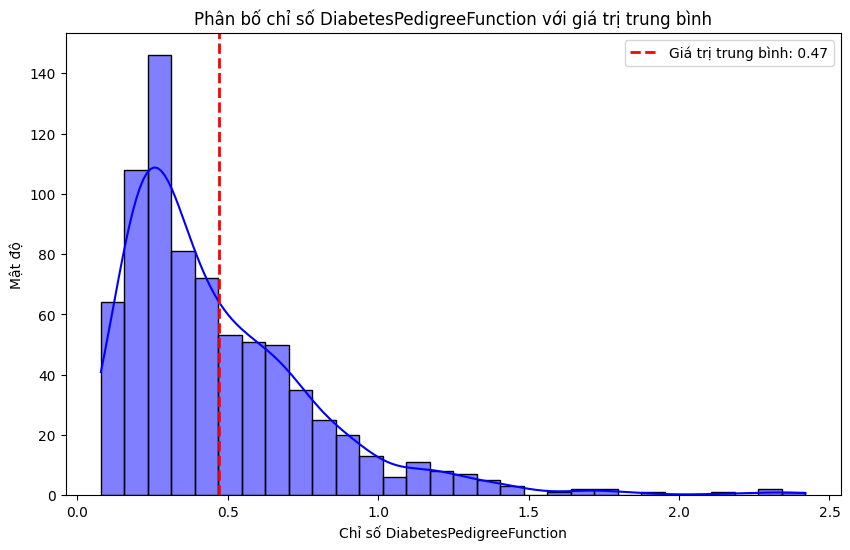

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tính giá trị trung bình của cột DiabetesPedigreeFunction
avg_pedigree = df1['DiabetesPedigreeFunction'].mean()

# Vẽ biểu đồ KDE (ước tính mật độ hạt nhân) để xem phân bố của chỉ số
plt.figure(figsize=(10, 6))
sns.histplot(df1['DiabetesPedigreeFunction'], kde=True, color='blue', bins=30)

# Vẽ một đường thẳng đứng tại giá trị trung bình
plt.axvline(avg_pedigree, color='red', linestyle='--', linewidth=2, label=f'Giá trị trung bình: {avg_pedigree:.2f}')

plt.title('Phân bố chỉ số DiabetesPedigreeFunction với giá trị trung bình')
plt.xlabel('Chỉ số DiabetesPedigreeFunction')
plt.ylabel('Mật độ')
plt.legend()
plt.show()

Biểu đồ phân phối chỉ số DiabetesPedigreeFunction cho thấy phần lớn bệnh nhân có chỉ số nguy cơ di truyền thấp (dưới giá trị trung bình khoảng 0.47).
Số lượng bệnh nhân có chỉ số cao (> 1) là khá ít, cho thấy nguy cơ di truyền cao không phổ biến trong cộng đồng người Pima này.

Phân phối có xu hướng lệch phải, tập trung nhiều ở các giá trị thấp và giảm dần ở các giá trị cao. Điều này phản ánh đa số bệnh nhân có nguy cơ di truyền thấp, nhưng vẫn tồn tại một nhóm nhỏ có nguy cơ cao cần được chú ý trong các phân tích tiếp theo.

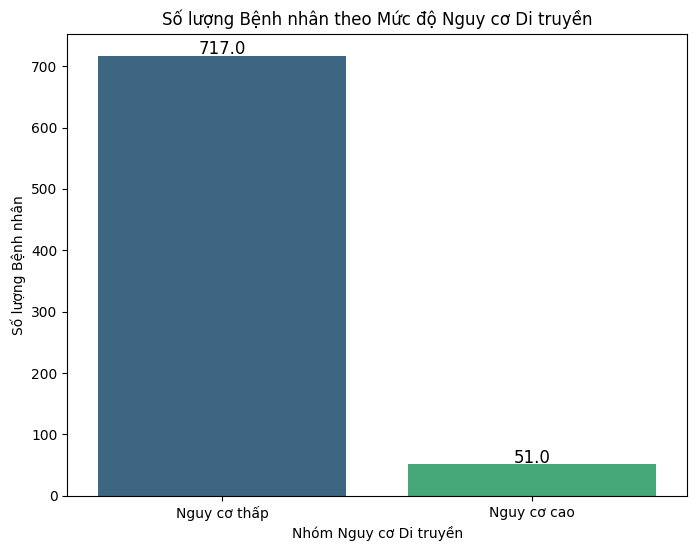

In [28]:
# Tạo một cột phân loại mới: 'Nguy cơ Di truyền'
# Phân loại bệnh nhân thành 2 nhóm: "Nguy cơ cao" (DPF > 1) và "Nguy cơ thấp" (DPF <= 1)
df1['Genetic_Risk'] = df1['DiabetesPedigreeFunction'].apply(lambda x: 'Nguy cơ cao' if x > 1 else 'Nguy cơ thấp')

# Vẽ biểu đồ cột để đếm số lượng bệnh nhân trong mỗi nhóm
plt.figure(figsize=(8, 6))
sns.countplot(x='Genetic_Risk', data=df1, hue='Genetic_Risk', palette='viridis', legend=False)
plt.title('Số lượng Bệnh nhân theo Mức độ Nguy cơ Di truyền')
plt.xlabel('Nhóm Nguy cơ Di truyền')
plt.ylabel('Số lượng Bệnh nhân')

# Thêm nhãn số liệu trên mỗi cột
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

Biểu đồ cột cho thấy phần lớn bệnh nhân trong bộ dữ liệu thuộc nhóm "Nguy cơ thấp" (chỉ số Diabetes Pedigree Function ≤ 1), trong khi số lượng bệnh nhân có "Nguy cơ cao" (chỉ số > 1) chiếm tỷ lệ nhỏ hơn.

Điều này cho thấy yếu tố di truyền cao không phổ biến trong cộng đồng người Pima, nhưng vẫn có một nhóm nhỏ bệnh nhân có nguy cơ di truyền nổi bật.

Việc nhận diện nhóm nguy cơ cao giúp tập trung các biện pháp phòng ngừa và theo dõi sát hơn đối với những cá nhân này.

**Nhị biến (Bivariate Analysis)**

Ở bước phân tích nhị biến này, chúng ta sẽ đi sâu hơn để khám phá mối quan hệ giữa chỉ số Diabetes Pedigree Function (DPF) và biến mục tiêu 'Outcome' (kết quả chẩn đoán tiểu đường: 0 - Không mắc, 1 - Mắc). Câu hỏi nghiên cứu đặt ra là: **Liệu chỉ số DPF có khác biệt đáng kể giữa nhóm bệnh nhân mắc và không mắc bệnh tiểu đường hay không?**

Để trả lời câu hỏi này, tôi sẽ sử dụng biểu đồ violin plot. Biểu đồ này là lựa chọn tốt vì nó không chỉ hiển thị phân phối (mật độ) của chỉ số DPF cho từng nhóm (Outcome = 0 và Outcome = 1) mà còn cho thấy các thống kê tóm tắt như trung vị và tứ phân vị thông qua các đường kẻ bên trong. Điều này giúp tôi trực quan so sánh hình dạng phân phối, xu hướng trung tâm và sự biến động của DPF giữa hai nhóm.

Tôi kỳ vọng sẽ thấy rằng nhóm bệnh nhân mắc tiểu đường (Outcome = 1) sẽ có xu hướng có chỉ số DPF cao hơn so với nhóm không mắc tiểu đường (Outcome = 0), phản ánh vai trò của tiền sử gia đình như một yếu tố nguy cơ.

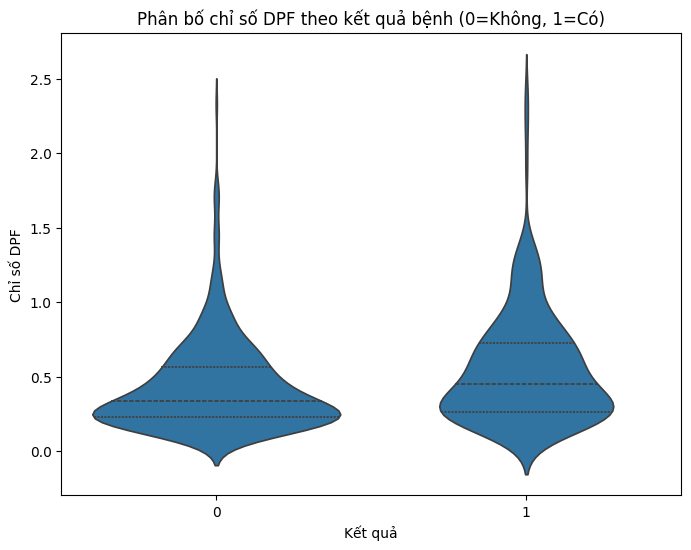

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có DataFrame 'df' sau khi làm sạch
# (đã xử lý giá trị 0 và dữ liệu thiếu)

plt.figure(figsize=(8, 6))
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=df1, inner='quartile')
plt.title('Phân bố chỉ số DPF theo kết quả bệnh (0=Không, 1=Có)')
plt.xlabel('Kết quả')
plt.ylabel('Chỉ số DPF')
plt.show()

Quan sát biểu đồ violin plot, chúng ta có thể nhận thấy sự khác biệt trong phân phối chỉ số Diabetes Pedigree Function (DPF) giữa hai nhóm: nhóm không mắc tiểu đường (Outcome = 0) và nhóm mắc tiểu đường (Outcome = 1).

- **Nhóm không mắc tiểu đường (Outcome = 0):** Biểu đồ violin cho thấy phân phối DPF tập trung chủ yếu ở các giá trị thấp hơn. Hình dạng của violin hẹp ở phần giá trị cao, cho thấy ít bệnh nhân trong nhóm này có chỉ số DPF cao.
- **Nhóm mắc tiểu đường (Outcome = 1):** Biểu đồ violin cho thấy phân phối DPF có xu hướng trải rộng hơn và có mật độ đáng kể ở các giá trị DPF cao hơn so với nhóm không mắc tiểu đường. Phần rộng hơn của violin ở các giá trị DPF cao hơn cho thấy có nhiều bệnh nhân mắc tiểu đường có tiền sử gia đình về bệnh này.

**Nhận xét:**

Biểu đồ này củng cố nhận định rằng chỉ số Diabetes Pedigree Function có mối liên hệ với nguy cơ mắc bệnh tiểu đường. Những bệnh nhân có chỉ số DPF cao hơn có xu hướng nằm trong nhóm mắc tiểu đường. Điều này cho thấy tiền sử gia đình đóng vai trò là một yếu tố nguy cơ quan trọng đối với bệnh tiểu đường type 2 trong tập dữ liệu này.

**Đa biến (Multivariate Analysis)**

Phân tích đa biến là việc khám phá mối quan hệ phức tạp giữa nhiều biến cùng một lúc để hiểu cách chúng tương tác và ảnh hưởng đến kết quả cuối cùng.

Trong bộ dữ liệu Pima, phân tích đa biến giúp chúng ta:

+ Hiểu cách các yếu tố như DPF, BMI, Glucose và Tuổi kết hợp với nhau để dự đoán khả năng mắc bệnh tiểu đường.

+ Nhận diện các tương quan hoặc tương tác tiềm ẩn giữa các yếu tố.

+ Xây dựng nền tảng cho các mô hình dự đoán chính xác hơn, vì nó cung cấp cái nhìn toàn diện hơn về các yếu tố nguy cơ.

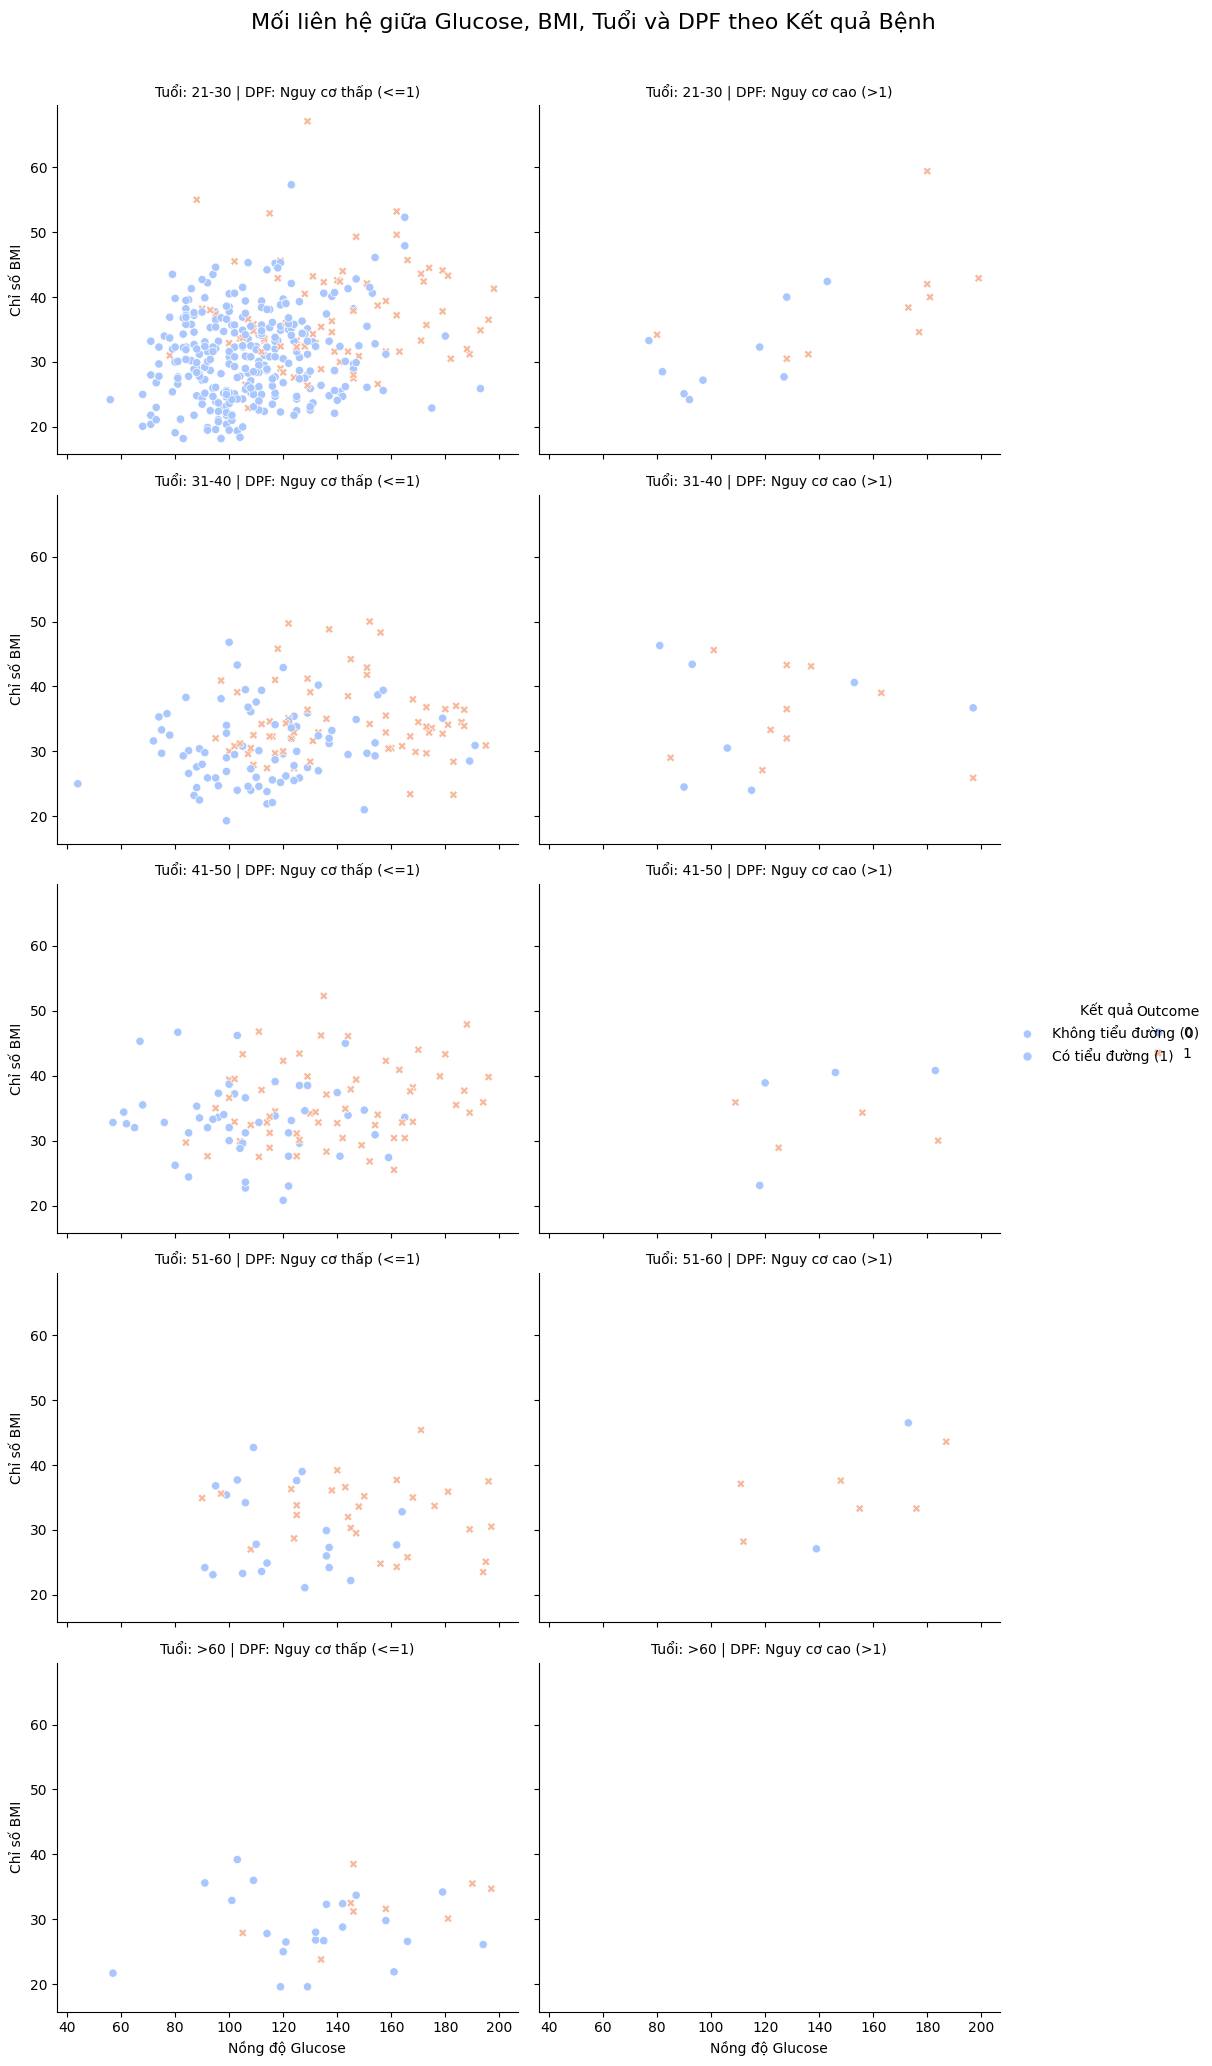

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Phân loại Age và DPF thành các nhóm để dễ trực quan
# Cập nhật bin cho Age để phân phối đều hơn giữa các nhóm
bins_age = [df1['Age'].min(), 30, 40, 50, 60, df1['Age'].max()]
labels_age = ['21-30', '31-40', '41-50', '51-60', '>60']
df1['Age_Group'] = pd.cut(df1['Age'], bins=bins_age, labels=labels_age, right=False, include_lowest=True)

# Giữ nguyên phân loại DPF
df1['DPF_Risk'] = df1['DiabetesPedigreeFunction'].apply(lambda x: 'Nguy cơ cao (>1)' if x > 1 else 'Nguy cơ thấp (<=1)')

# Bước 2: Tạo biểu đồ tổ hợp với bố cục hàng dọc
# Tăng kích thước hình để dễ nhìn hơn
g = sns.relplot(
    data=df1,
    x='Glucose',
    y='BMI',
    row='Age_Group',
    col='DPF_Risk',
    hue='Outcome',
    palette='coolwarm', # Palette dễ phân biệt 0 và 1
    style='Outcome',
    height=4, # Chiều cao của mỗi subplot
    aspect=1.2 # Tỷ lệ khung hình của mỗi subplot
)

# Đặt tiêu đề cho các subplot và trục
g.fig.suptitle('Mối liên hệ giữa Glucose, BMI, Tuổi và DPF theo Kết quả Bệnh', fontsize=16, y=1.03) # y điều chỉnh vị trí tiêu đề

# Cải thiện nhãn trục cho từng subplot
g.set_titles("Tuổi: {row_name} | DPF: {col_name}")
g.set_axis_labels("Nồng độ Glucose", "Chỉ số BMI")

# Cải thiện nhãn chú giải (legend)
g.add_legend(title='Kết quả', labels=['Không tiểu đường (0)', 'Có tiểu đường (1)'])


plt.show()

Từ các biểu đồ trên, chúng ta thấy rằng nguy cơ mắc bệnh tiểu đường chịu ảnh hưởng phức tạp bởi sự kết hợp của nhiều yếu tố.

*   **Glucose là chỉ báo mạnh mẽ nhất:** Biểu đồ mật độ (KDE) cho thấy sự phân tách rõ rệt, với nhóm mắc tiểu đường có nồng độ Glucose cao hơn hẳn nhóm không mắc bệnh. Điều này khẳng định Glucose là yếu tố dự báo cực kỳ quan trọng.
*   **BMI và Tuổi tác cũng đóng vai trò lớn:** Tương tự Glucose, BMI và Tuổi cũng cao hơn đáng kể ở nhóm mắc tiểu đường.
*   **Ảnh hưởng kết hợp của DPF, BMI, Glucose và Age:**
    *   Biểu đồ trên minh họa rõ nhất rằng nguy cơ mắc bệnh tiểu đường tăng mạnh khi các yếu tố **Glucose cao, BMI cao và Tuổi cao** cùng xuất hiện.
    *   Chỉ số nguy cơ di truyền (DPF), mặc dù không nổi bật khi đứng một mình nhưng vẫn **góp phần làm tăng nguy cơ**, đặc biệt là khi kết hợp với Glucose, BMI và Tuổi cao. Nó có thể là yếu tố "đẩy" nguy cơ lên cao hơn khi các yếu tố khác đã ở mức đáng ngại.

**Kết luận chung:** Bệnh tiểu đường trong tập dữ liệu này chủ yếu được dự báo bởi sự kết hợp của **Glucose cao, BMI cao và Tuổi cao**. Chỉ số **Diabetes Pedigree Function (DPF)** cũng là một yếu tố quan trọng, làm tăng thêm nguy cơ, đặc biệt khi các yếu tố khác đã hiện diện. Việc xem xét đồng thời cả 4 yếu tố này cung cấp bức tranh toàn diện nhất về nguy cơ mắc bệnh.

# 6. Phân tích theo nhóm

Ở phần "Phân tích theo nhóm" này, chúng ta sẽ đi sâu vào việc so sánh các đặc điểm và tỷ lệ mắc bệnh giữa các nhóm bệnh nhân khác nhau trong tập dữ liệu.

Mục tiêu chính là để:

*   **Khám phá sự khác biệt:** Xem xét các chỉ số y tế và tỷ lệ mắc bệnh tiểu đường có sự khác biệt đáng kể giữa các nhóm được định nghĩa dựa trên các yếu tố như Tuổi tác, Chỉ số BMI, hoặc các yếu tố khác hay không.
*   **Nhận diện nhóm nguy cơ cao:** Xác định những nhóm bệnh nhân cụ thể có tỷ lệ mắc bệnh tiểu đường cao hơn so với các nhóm khác.

Chúng ta sẽ thực hiện điều này bằng cách phân chia dữ liệu thành các nhóm dựa trên các biến phân loại hoặc bằng cách tạo các nhóm từ biến liên tục (ví dụ: nhóm tuổi, nhóm BMI) và sau đó sử dụng các biểu đồ (như biểu đồ cột, boxplot) và thống kê mô tả để so sánh các đặc điểm và tỷ lệ Outcome giữa các nhóm này.

**Đơn biến (Univariate Analysis)**

**Tỷ lệ bệnh nhân trẻ (<30 tuổi) vs. nhóm lớn tuổi (>50 tuổi)**

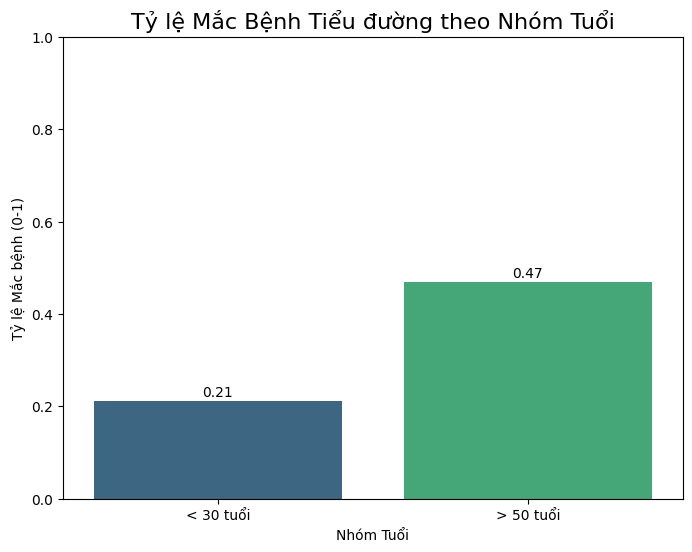

In [55]:
# Bước 1: Lọc dữ liệu thành hai nhóm tuổi
df_young = df1[df1['Age'] < 30]
df_old = df1[df1['Age'] > 50]

# Bước 2: Tính tỷ lệ mắc bệnh (Outcome) cho từng nhóm
diabetes_rate_young = df_young['Outcome'].mean()
diabetes_rate_old = df_old['Outcome'].mean()

# Bước 3: Tạo DataFrame mới để vẽ biểu đồ
rate_df = pd.DataFrame({
    'Nhóm Tuổi': ['< 30 tuổi', '> 50 tuổi'],
    'Tỷ lệ Mắc bệnh': [diabetes_rate_young, diabetes_rate_old]
})

# Bước 4: Tạo biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x='Nhóm Tuổi', y='Tỷ lệ Mắc bệnh', data=rate_df, palette='viridis', hue='Nhóm Tuổi', legend=False)
plt.title('Tỷ lệ Mắc Bệnh Tiểu đường theo Nhóm Tuổi', fontsize=16)
plt.xlabel('Nhóm Tuổi')
plt.ylabel('Tỷ lệ Mắc bệnh (0-1)')

# Thêm nhãn giá trị trên mỗi cột
for index, row in rate_df.iterrows():
    plt.text(index, row['Tỷ lệ Mắc bệnh'] + 0.01, f'{row["Tỷ lệ Mắc bệnh"]:.2f}',
             color='black', ha='center')

plt.ylim(0, 1)
plt.show()

Biểu đồ cột này so sánh tỷ lệ mắc bệnh tiểu đường (Outcome = 1) giữa nhóm bệnh nhân trẻ (< 30 tuổi) và nhóm bệnh nhân lớn tuổi (> 50 tuổi).

*   **Nhóm trẻ (< 30 tuổi):** Tỷ lệ mắc bệnh tiểu đường là khoảng 0.21 (hoặc 21%).
*   **Nhóm lớn tuổi (> 50 tuổi):** Tỷ lệ mắc bệnh tiểu đường là khoảng 0.47 (hoặc 47%).

Từ đó ta thấy có sự khác biệt rõ rệt về tỷ lệ mắc bệnh tiểu đường giữa hai nhóm tuổi này. Nhóm bệnh nhân lớn tuổi (> 50 tuổi) có tỷ lệ mắc bệnh tiểu đường cao hơn đáng kể so với nhóm bệnh nhân trẻ (< 30 tuổi).

**Kết luận:**

Biểu đồ này củng cố nhận định rằng **tuổi tác là một yếu tố nguy cơ quan trọng đối với bệnh tiểu đường type 2** trong tập dữ liệu này. Bệnh nhân càng lớn tuổi thì khả năng mắc bệnh tiểu đường càng cao. Điều này phù hợp với hiểu biết chung về bệnh tiểu đường type 2, vốn thường phổ biến hơn ở người lớn tuổi.

**Tỷ lệ bệnh nhân theo nhóm BMI: thiếu cân, bình thường, thừa cân, béo phì.**

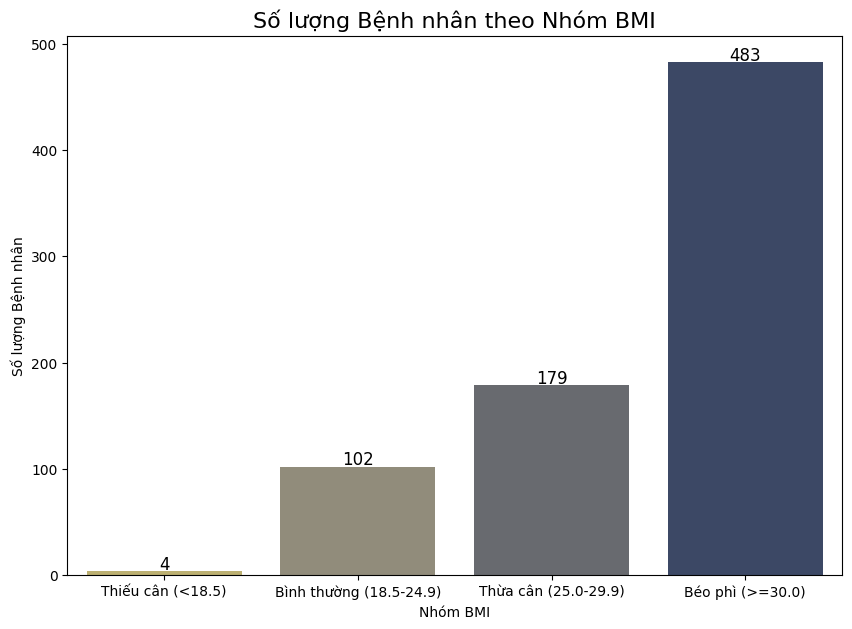

In [57]:
# Bước 1: Phân loại BMI thành các nhóm
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Thiếu cân (<18.5)'
    elif 18.5 <= bmi < 25.0:
        return 'Bình thường (18.5-24.9)'
    elif 25.0 <= bmi < 30.0:
        return 'Thừa cân (25.0-29.9)'
    else:
        return 'Béo phì (>=30.0)'

df1['BMI_Category'] = df1['BMI'].apply(categorize_bmi)

# Bước 2: Sắp xếp các nhóm để biểu đồ hiển thị đúng thứ tự
bmi_order = ['Thiếu cân (<18.5)', 'Bình thường (18.5-24.9)', 'Thừa cân (25.0-29.9)', 'Béo phì (>=30.0)']

# Bước 3: Tạo biểu đồ cột để đếm số lượng bệnh nhân trong mỗi nhóm
plt.figure(figsize=(10, 7))
sns.countplot(x='BMI_Category', data=df1, order=bmi_order, palette='cividis', hue='BMI_Category', legend=False)

plt.title('Số lượng Bệnh nhân theo Nhóm BMI', fontsize=16)
plt.xlabel('Nhóm BMI')
plt.ylabel('Số lượng Bệnh nhân')

# Thêm nhãn số liệu trên mỗi cột
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

Biểu đồ cột này hiển thị số lượng bệnh nhân trong từng nhóm BMI (Thiếu cân, Bình thường, Thừa cân, Béo phì).

*   **Nhóm "Béo phì" (>=30.0) chiếm số lượng lớn nhất:** Đây là nhóm có số lượng bệnh nhân đông đảo nhất trong tập dữ liệu.
*   **Nhóm "Bình thường" (18.5-24.9) và "Thừa cân" (25.0-29.9) có số lượng tương đương và đứng thứ hai:** Số lượng bệnh nhân trong hai nhóm này gần bằng nhau và ít hơn đáng kể so với nhóm béo phì.
*   **Nhóm "Thiếu cân" (<18.5) có số lượng ít nhất:** Nhóm này chỉ chiếm một phần rất nhỏ trong tổng số bệnh nhân.

Phân tích này chỉ ra rằng phần lớn bệnh nhân trong tập dữ liệu này đều bị thừa cân hoặc béo phì. Đây là một phát hiện quan trọng vì chỉ số BMI là một yếu tố nguy cơ hàng đầu đối với bệnh tiểu đường. Dựa vào nhận xét này, chúng ta có thể tập trung phân tích sâu hơn mối quan hệ giữa BMI và khả năng mắc bệnh, từ đó đưa ra những dự đoán chính xác hơn.

**Tỷ lệ bệnh nhân mang thai nhiều lần (≥5 lần).**

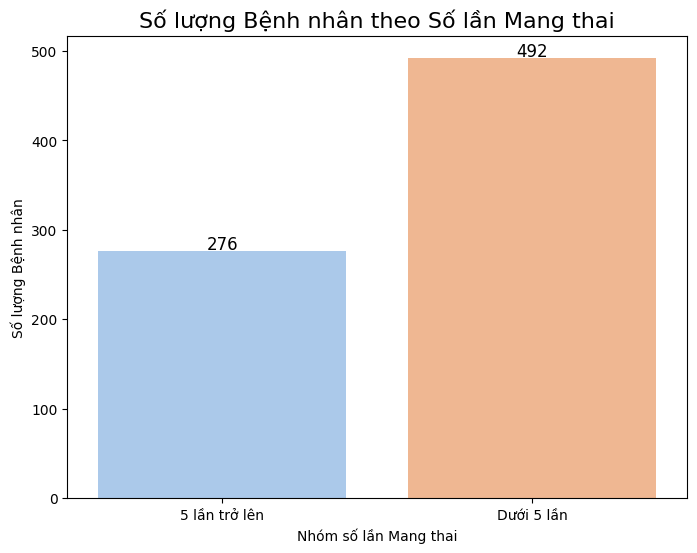

In [60]:
# Bước 1: Phân loại bệnh nhân thành hai nhóm
df1['High_Pregnancies'] = df1['Pregnancies'].apply(lambda x: '5 lần trở lên' if x >= 5 else 'Dưới 5 lần')

# Bước 2: Tạo biểu đồ cột để đếm số lượng bệnh nhân trong mỗi nhóm
plt.figure(figsize=(8, 6))
sns.countplot(x='High_Pregnancies', data=df1, palette='pastel', hue='High_Pregnancies', legend=False)

plt.title('Số lượng Bệnh nhân theo Số lần Mang thai', fontsize=16)
plt.xlabel('Nhóm số lần Mang thai')
plt.ylabel('Số lượng Bệnh nhân')

# Thêm nhãn số liệu trên mỗi cột
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

Biểu đồ cột này cung cấp một cái nhìn tổng quan về sự phân bố số lần mang thai của các bệnh nhân trong tập dữ liệu. Nó giúp chúng ta hiểu được đặc điểm sinh sản của nhóm đối tượng này.

+ **Phần lớn mang thai dưới 5 lần:** Biểu đồ cho thấy nhóm "Dưới 5 lần" có số lượng bệnh nhân cao hơn đáng kể (492 bệnh nhân) so với nhóm "5 lần trở lên" (276 bệnh nhân). Điều này cho thấy phần lớn đối tượng trong tập dữ liệu đã trải qua dưới 5 lần mang thai.

+ **Nhóm mang thai nhiều lần vẫn đáng kể:** Mặc dù ít hơn, số lượng bệnh nhân mang thai từ 5 lần trở lên vẫn chiếm một tỷ lệ đáng kể. Điều này cho thấy nhóm này cũng là một phần quan trọng trong dữ liệu, cần được phân tích sâu hơn.

Phân tích này chỉ ra rằng mặc dù phần lớn bệnh nhân có số lần mang thai dưới 5 lần, nhóm có số lần mang thai nhiều hơn vẫn chiếm một phần không nhỏ. Đây là một phát hiện quan trọng vì số lần mang thai là một yếu tố nguy cơ được biết đến đối với bệnh tiểu đường.  Dựa vào nhận xét này, chúng ta có thể tập trung phân tích sâu hơn mối quan hệ giữa số lần mang thai và khả năng mắc bệnh để đưa ra những dự đoán chính xác hơn.